In [1]:
from google.colab import files
import io
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report,  confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

In [2]:
uploaded = files.upload()

Saving advertisments.csv to advertisments.csv


In [3]:
ads = pd.read_csv(io.BytesIO(uploaded['advertisments.csv']))

In [4]:
ads.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
ads.shape

(400, 5)

In [6]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
ads['Purchased'].unique()

array([0, 1])

In [8]:
ads_clean = ads.drop(columns = ['User ID'])

In [9]:
ads_clean

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
X = pd.get_dummies(ads_clean['Gender']).join(ads_clean['Age']).join(ads_clean['EstimatedSalary'])
X.head()

,Female,Male,Age,EstimatedSalary
0,0,1,19,19000
1,0,1,35,20000
2,1,0,26,43000
3,1,0,27,57000
4,0,1,19,76000


In [11]:
y = ads_clean['Purchased']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
predictions = log_reg.predict(X_test)
confusion_matrix(y_test, predictions)

array([[76,  1],
       [35,  8]])

In [15]:
log_reg.score(X_test, y_test)

0.7

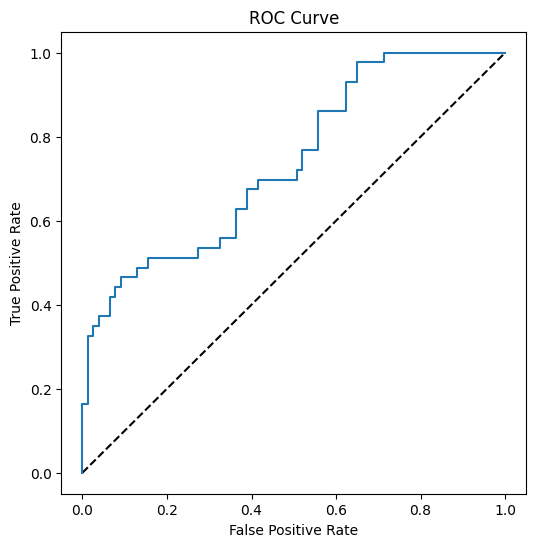

In [16]:
y_scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

fig = plt.figure(figsize=(6,6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.7375415282392026


In [18]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [19]:
log_reg_scaled = LogisticRegression()

In [20]:
log_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
predictions_scaled = log_reg_scaled.predict(X_test_scaled)

In [22]:
confusion_matrix(y_test, predictions_scaled)

array([[70,  7],
       [ 9, 34]])

In [23]:
log_reg_scaled.score(X_test_scaled, y_test)

0.8666666666666667

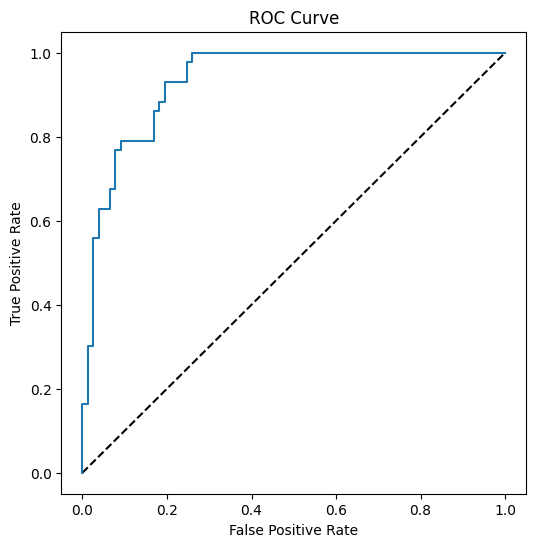

In [24]:
y_scores_scaled = log_reg_scaled.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_scaled[:,1])

fig = plt.figure(figsize=(6,6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
auc = roc_auc_score(y_test, y_scores_scaled[:,1])
print(auc)

0.933856840833585


In [26]:
classif = svm.SVC()
classif.fit(X_train_scaled, y_train)

SVC()

In [27]:
pred_svc_scaled = classif.predict(X_test_scaled)

In [28]:
confusion_matrix(y_test, pred_svc_scaled)

array([[68,  9],
       [ 4, 39]])

In [29]:
classif.score(X_test_scaled, y_test)

0.8916666666666667